1. PCA Experiments

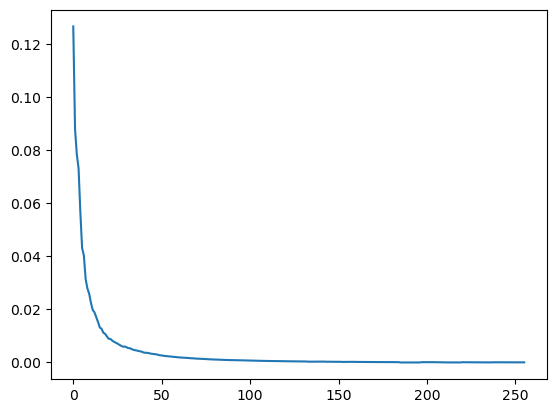

In [54]:
import os
import numpy as np

import matplotlib.pyplot as plt
# (a) set up data matrix X = (x_1, ..., x_n) \in R^{p \times n}
path = './datasets/zip.train'

def load_images(path):
    """
    load data from zip.train/test of hand written data.
    Args:
        path(str): the path of the dataset file.
    Return:
        images(numpy.ndarray): the numpy matrix of data in R^{p x n}
        
    
    """
    x, y = [], []

    with open(path, 'r') as f:
        for line in f:
            values = line.split()
            x.append([float(x) for x in values[1:]])
            y.append(int(float(values[0])))
            
    return np.array(x), np.array(y)
    
x, y = load_images(path)
cls_id = 3
x = x[y==cls_id, :] 

# x: R^{p x n} -> R^{256 x 7291}
x = np.transpose(x)
p, n = x.shape
# (b) compute the sample mean \hat{\mu_{n}} and form \tilde{X} = X - e \hat{\mu_{n}^T}

x_mean = x.mean(axis=1)
x_tilde = x - x_mean.reshape(p, 1)

# (c) compute top k SVD of \tilde{X} = US_kV^{T}
u, s, vh = np.linalg.svd(x_tilde)

# (d) Plot eigenvalue curve 
x_cov = (1/n) * np.matmul(x_tilde, x_tilde.T)
trace_cov = np.trace(x_cov)
e_val, e_vec = np.linalg.eig(x_cov)

plt.plot(e_val/trace_cov)



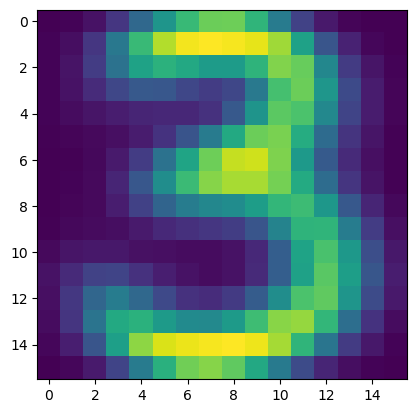

In [55]:
# (e) images mean
topk = 6
im_mean = x_mean.reshape(16, 16) 

plt.imshow(im_mean)


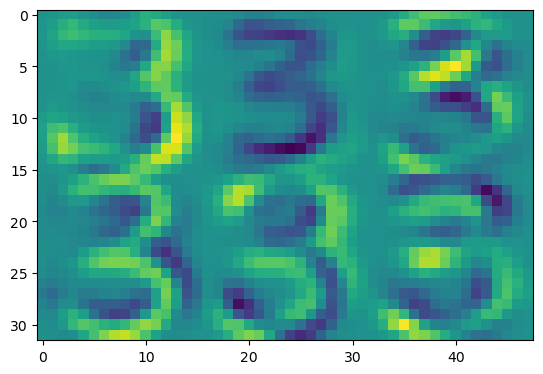

In [56]:
# top-k principle components
sing_vecs = u[:, :6] # 256 x 6
m, n = 2, 3
im_sings = np.zeros((16 * m, 16 * n))

k = 0
for i in range(m):
    for j in range(n):
        im_sings[i*16:(i+1)*16, j*16:(j+1)*16] = sing_vecs[:, k].reshape(16,16)
        k += 1
plt.imshow(im_sings)

In [57]:
# (f) ordering the images according to top first right singular vector
v1 = vh[0, :]
v1_order = np.argsort(v1)
print(v1_order)


[469 118  84 280 150 446 480  36 442 448 165 238 127 409  78 170  24 183
 254 364 140 163 250 193 390 403 173 656 555 246 360  72 391 263 458 309
 534 566  48 155 283 407 342  21 589 101  77  26 306 526 580 273 641 615
 111  94  38 143 383  22  25 408 368  40 550 116  75 217 294  30 126 406
 186 474 444 166 329 296 292 362 102 265 112 456 293 218 546 357 462 249
  62 124 144  56  96 381 305 563 612 624   4   1 450 308 556 164 539  47
 239 266 248 472 341 384 299 489 274 375 337 216 338 174 351 223 454 137
 201 319 371 613 591 569 251 367 227 431  37 623 535 171 347 279 361  46
 152 240 258 284 512 418  65  49 210 552 148 447 185 187  83 344 547 475
   5 311 581 184 509 502 655 268 343 429 393 540 595 237 255 244 487 110
 419  55 138 620 433 300  42 532 236 551 179 220  89 505 582 373 331 481
 628 548 192 379 643  28 134 428  74 267 290 573 194 576  68  95 230 105
 366 461 642 139 545 640 221  67 610 533 206 264  97 336 180 108  70 158
 370 493 400  12 191 396 232 231 601 247  15 439 53

(658,) (658,)


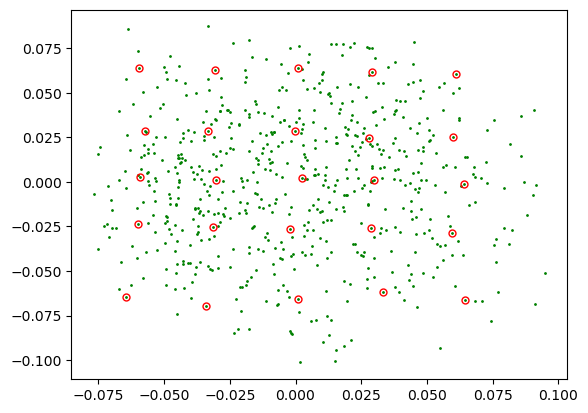

In [70]:
# (g) compute scatter plot and select a grid to show images on the grid

v2 = vh[1, :]
print(v1.shape, v2.shape)
plt.plot(v1, v2, 'go', markersize=1)

quantiles = (np.array([0.05, 0.25, 0.50, 0.75, 0.95]) * v2.shape[0]).astype(np.int32)
v2_order = np.argsort(v2)
v1_qs, v2_qs = [v1_order[i] for i in quantiles], [v2_order[i] for i in quantiles]


n_q = len(quantiles)
v1_qs_all = np.tile(v1[v1_qs].reshape(-1, 1),(1, n_q)).reshape(-1, 1)
v2_qs_all = np.tile(v2[v2_qs].reshape(1, -1),(n_q, 1)).reshape(-1, 1)
point_qs_all = np.concatenate([v1_qs_all, v2_qs_all], axis=1)

point_v1v2 = np.concatenate([v1.reshape(-1,1), v2.reshape(-1,1)], axis=1)

closest_pts = []
closest_idxs = []
for point_q in point_qs_all:
    dist = np.sum((point_v1v2 - point_q.reshape(-1, 2))**2, axis=1)
    idx = np.argmin(dist)
    closest_idxs.append(idx)
    closest_pts.append(point_v1v2[idx])

# Plot the closest points to the quantiles.
closest_pts = np.array(closest_pts)
plt.plot(closest_pts[:,0], closest_pts[:,1], 
          'ro', markersize=5, markerfacecolor='none')

plt.show()

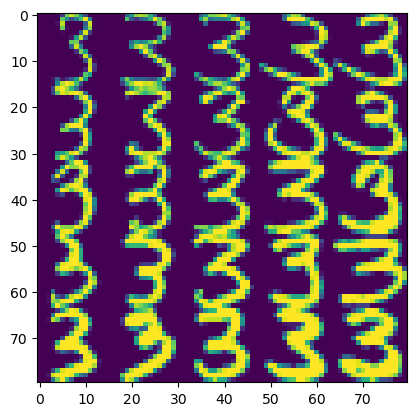

In [75]:
# Draw the selected images
x_draw = x[:, closest_idxs]
draw_canvas = np.zeros((16*5, 16*5))
k = 0
for i in range(5):
    for j in range(5):
        draw_canvas[(4-j)*16:(5-j)*16, i*16:(i+1)*16] = x_draw[:, k].reshape(16, 16)
        k += 1
plt.imshow(draw_canvas)

In [95]:
# (h) horn's parallel analysis
def perumtated_lambdas(x):
    permutation = np.random.permutation(x.shape[1])
    x_permutated = x[:, permutation]
    u, s, vh = np.linalg.svd(x_permutated)
    return s

R = 1000
lambdas = []
u, s, vh = np.linalg.svd(x_tilde)
ori_lambdas = s
for i in range(R):
    lambdas.append(perumtated_lambdas(x_tilde))
lambdas = np.stack(lambdas)  # R x p
pvals = np.mean(lambdas > ori_lambdas.reshape(1, -1), axis=0)
lambda_idxs = np.where(pvals < 0.05)
kept_lambdas = lambdas[lambda_idxs]
print(kept_lambdas.shape, lambda_idxs, kept_lambdas)


(8, 256) (array([  5,   9,  63, 107, 110, 111, 194, 239]),) [[8.66159137e+01 7.21885599e+01 6.81797210e+01 ... 2.14251744e-01
  3.63812404e-02 1.14747308e-03]
 [8.66159137e+01 7.21885599e+01 6.81797210e+01 ... 2.14251744e-01
  3.63812404e-02 1.14747308e-03]
 [8.66159137e+01 7.21885599e+01 6.81797210e+01 ... 2.14251744e-01
  3.63812404e-02 1.14747308e-03]
 ...
 [8.66159137e+01 7.21885599e+01 6.81797210e+01 ... 2.14251744e-01
  3.63812404e-02 1.14747308e-03]
 [8.66159137e+01 7.21885599e+01 6.81797210e+01 ... 2.14251744e-01
  3.63812404e-02 1.14747308e-03]
 [8.66159137e+01 7.21885599e+01 6.81797210e+01 ... 2.14251744e-01
  3.63812404e-02 1.14747308e-03]]


2. MDS Experiments

In [99]:
# (a) input a few cities and collect the pairwise air traveling distances
""""
Aberystwyth
Brighton
Edinburgh
Exeter
Glasgow
Inverness
Liverpool
London
Newcastle
Nottingham
Oxford
Stratford
"""

distances = "   0 300 352 466 217 238 431 336 451  47 415 515" \
            " 300   0 638 180 595 190 138 271 229 236 214 393" \
            " 352 638   0 251  88 401 189 386 565 206 292 349" \
            " 466 180 251   0 139 371 169 316 180 284 206 198" \
            " 217 595  88 139   0 310 211 295 474 130 133 165" \
            " 238 190 401 371 310   0 202 122 378 157 362 542" \
            " 431 138 189 169 211 202   0 183  67 268 117 369" \
            " 336 271 386 316 295 122 183   0 483 155 448 108" \
            " 451 229 565 180 474 378  67 483   0 299 246 418" \
            " 47 236 206 284 130 157 268 155 299   0 202 327" \
            " 415 214 292 206 133 362 117 448 246 202   0 394" \
            " 515 393 349 198 165 542 368 108 418 327 394   0"
distances = np.array([int(dist) for dist in distances.split()]).reshape(12, 12)
print(distances.shape, distances)




(12, 12) [[  0 300 352 466 217 238 431 336 451  47 415 515]
 [300   0 638 180 595 190 138 271 229 236 214 393]
 [352 638   0 251  88 401 189 386 565 206 292 349]
 [466 180 251   0 139 371 169 316 180 284 206 198]
 [217 595  88 139   0 310 211 295 474 130 133 165]
 [238 190 401 371 310   0 202 122 378 157 362 542]
 [431 138 189 169 211 202   0 183  67 268 117 369]
 [336 271 386 316 295 122 183   0 483 155 448 108]
 [451 229 565 180 474 378  67 483   0 299 246 418]
 [ 47 236 206 284 130 157 268 155 299   0 202 327]
 [415 214 292 206 133 362 117 448 246 202   0 394]
 [515 393 349 198 165 542 368 108 418 327 394   0]]


(12, 12) (12, 12) (12, 12)


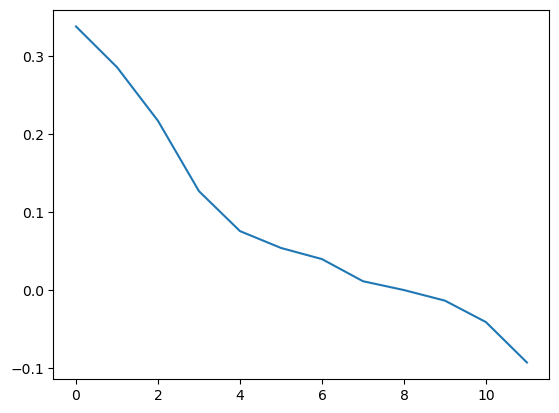

In [112]:
# (b) Make yout own codes of MDS 
def MDS(D, k):
    """
    Implement the classical MDS algorithm.
    Args:
        D:A distance matrix
    Return:
        Z(numpy.ndarray): Z \in R^{k x n}
    """
    n = D.shape[0]
    H = np.eye(n) - 1/n * np.ones((n,n))
    K = (-0.5) * np.matmul(np.matmul(H, D), H)
    print(K.shape, H.shape, D.shape)
    eigen_vals, eigen_vecs = np.linalg.eig(K)
    eigen_orders = np.argsort(eigen_vals)[-k:]
    topk_vals, topk_vecs = eigen_vals[eigen_orders], eigen_vecs[eigen_orders,:]
    
    Z = np.matmul(np.sqrt(np.diag(topk_vals)), topk_vecs)
    return Z, eigen_vals, eigen_vecs

k = 5
Z, eigen_vals, eigen_vecs = MDS(distances, k)
eigen_order = np.argsort(eigen_vals)[::-1]
eigen_vals = eigen_vals[eigen_order] / np.sum(eigen_vals)

plt.plot(eigen_vals)
    

(12, 2)


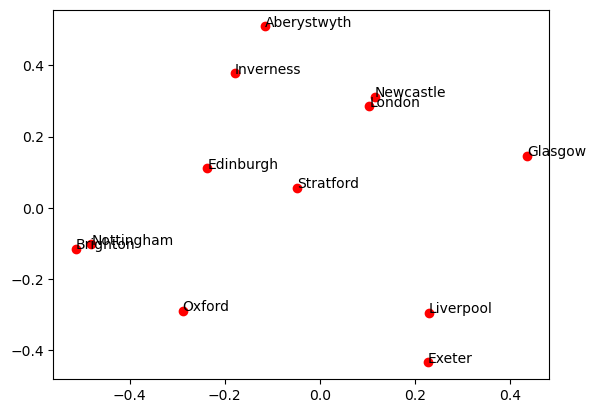

In [125]:
cities = """
Aberystwyth
Brighton
Edinburgh
Exeter
Glasgow
Inverness
Liverpool
London
Newcastle
Nottingham
Oxford
Stratford
"""
cities = cities.split()
eigen_points = eigen_vecs[eigen_order[:2],:].T
print(eigen_points.shape)
plt.plot(eigen_points[:,0], eigen_points[:,1], 'ro')
for i in range(len(cities)):
    plt.text(eigen_points[i, 0], eigen_points[i, 1], cities[i])
plt.show()

## 3.  Positive Semi-definiteness

(a). Show that  $K \succeq 0$ if and only if its eigenvalues are all nonnegative.

$\Leftarrow$: if K's eigenvalues are all nonnegative,

then by $K=A^T\Lambda A=(A\Lambda^{1/2})^T (A\Lambda^{1/2})$, where $A$ is an orthogonal matrix, so
$x^TKx = (xA\Lambda^{1/2})^T(xA\Lambda^{1/2}) \ge 0$ then $K \succeq 0$.

$\Rightarrow$: if $K \succeq 0$,

$x^TKx = (xA)^T\Lambda(xA) \ge 0$, since $A$ is orthogonal, the $xA$ can cover the whole space of $R^{n}$ if $x \in R^{n}$. In this case if there is a negative eigenvalue in $\Lambda$ then we can always find a $y=xA$ such that $y^T\Lambda y < 0$ (make the negative part large enough). So $K$'s eigenvalues are all nonnegative.


(b). Show that $d_{ij} = K_{ii} + K_{jj} - 2K_{ij}$ is a squared distance function, i.e., there exists vectors $v_i, v_j \in R^{n}$ such that $d_{ij}=\|u_i-u_j\|^2$.

Since $K \succeq 0$, $K$ can be decomposed as $K=U^T U$, then let $U={u_i}_{i=1}^n$ we get $d_{ij}=K_{ii} + K_{jj} - 2K_{ij} = u_{i}^Tu_{i} + u_{j}^Tu_{j} - 2u_{i}^Tu_{j}=\|u_i-u_j\|^2$.

(c). Show that $B_{\alpha}= - \frac{1}{2}H_{\alpha}DH_{\alpha}^T \succeq 0$ for matrix $D=[d_{ij}]$.

$B_{\alpha}= - \frac{1}{2}H_{\alpha}DH_{\alpha}^T = - \frac{1}{2}H_{\alpha}(1\cdot k^T + k\cdot 1^T - 2K)H_{\alpha}^T$

Since $k\cdot 1^T \cdot H_{\alpha}^{T}=k\cdot 1^T(I-e^T\alpha)=k*1-k(e^T\alpha)*1=0$, then $B_{\alpha}=HKH^T=(XH)^T(XH)$ which indicates $B_{\alpha} \succeq 0$.

(d). If $A \succeq 0$ and $B \succeq 0$ show that $A+B \succeq 0$ and $A \circ B \succeq 0$.

if $A \succeq 0$ and $B \succeq 0$, then
$x^TAx \ge 0, x^TBx \ge 0$ for any $x$ then $x^T(A+B)x \ge 0$ which means $A+B \succeq 0$.

if $A \succeq 0$ and $B \succeq 0$, then
$A, B$ can be decomposed as $A=\sum \mu_{i}a_ia_{i}^T, A=\sum \nu_{i}b_i b_{i}^T$
$A \circ B = \sum \mu_i\nu_j (a_ia_i^T) \circ (b_ib_i^T) = \sum \mu_i\nu_j (a_i \circ b_i)  (a_i \circ b_i)^T$
since $(a_i \circ b_i)  (a_i \circ b_i)^T$ is postive semidefinite and $\mu_i\nu_j > 0$ so $x^T(A \circ B)x \ge 0$ which means $A \circ B \succeq 0$.

## 4. Distance
Actually, it is suffcienet to check whether the two functions satisfy triangle inequality?


(a). Is $d^2$ a distance function ?

if $d$ is euclidean distance defined on $R$.

for $x_1=3, x_2=4, x_3=5$
$d(x_1, x_2) + d(x_2, x_3) = 2 < d(x_1, x_3) = 4$ which violates the triangle inequality.


(b). Is $\sqrt{d}$ a distance function ?
Yes.
if for any $x,y,z \in R^{p}$, $d(x,y)+d(y,z) \ge d(x,z)$,
then 

$(\sqrt{d(x,y)} + \sqrt{d(y,z)}) \ge \sqrt{d(x,y)+d(y,z)} \ge \sqrt{d(x,z)} $ the first inequality holds by $d(x,y) + d(y,z) + 2\sqrt{d(x,y)d(y,z)} \ge d(x,y)+ d(y,z)$.

So $\sqrt{d}$ is a distance function.
